In [1]:
# Importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import math
import scipy.stats as stats
from tqdm import tqdm 
import time
import mplcyberpunk
import smtplib

# Cálculo Numérico
### Ferramenta auxiliar

*Thiago Laidler Vidal Cunha*

### Ajuste de curvas

In [2]:
def Minimos_Quadrados(x, y, func):
    """Ajuste de curva pelo método dos mínimos quadrados"""
    n = len(x)
    m = len(func)
    
    # Construção da matriz V
    V = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            V[i, j] = func[j](x[i])
    
    # Cálculo da matriz transposta de V
    Vt = V.T
    
    # Cálculo da matriz V^T * V = A
    VtV = np.dot(Vt, V)
    
    # Cálculo da matriz V^T * y = b
    VtY = np.dot(Vt, y)
    
    # Cálculo do vetor de coeficientes 
    coefficients = np.linalg.solve(VtV, VtY)
    
    # Criação dos DataFrames para armazenar as matrizes
    df_V = pd.DataFrame(V, columns=['f{}'.format(i+1) for i in range(m)])
    df_Vt = pd.DataFrame(Vt, columns=['f{}'.format(i+1) for i in range(n)])
    df_VtV = pd.DataFrame(VtV, columns=['f{}'.format(i+1) for i in range(m)], index=['f{}'.format(i+1) for i in range(m)])
    df_VtY = pd.DataFrame(VtY, columns=['y'])
    
    return df_V, df_Vt, df_VtV, df_VtY, coefficients

In [3]:
# Dados de entrada
x = [0, 0.25, 0.5, 0.75, 1]
y = [-153, 64, 242, 284, 175]
func = [lambda x: np.sin(np.pi * x), lambda x: np.cos(np.pi * x)]  # Funções de base. Lambda para criar funcoes com qualquer coeficiente

# Ajuste de curva pelo método dos mínimos quadrados
Minimos_Quadrados(x, y, func)[4]

array([ 244.03657993, -161.18783062])

In [4]:
# Função de ajuste: f = a + b*x + c*x^2
func = [lambda x: 1, lambda x: x, lambda x: x**2]

# Tabela de dados
x = np.array([0, 0.25, 0.5, 0.75, 1])
y = np.array([-153, 64, 242, 284, 175])

# Ajuste de curva pelo método dos mínimos quadrados
Minimos_Quadrados(x, y, func)

(    f1    f2      f3
 0  1.0  0.00  0.0000
 1  1.0  0.25  0.0625
 2  1.0  0.50  0.2500
 3  1.0  0.75  0.5625
 4  1.0  1.00  1.0000,
     f1      f2    f3      f4   f5
 0  1.0  1.0000  1.00  1.0000  1.0
 1  0.0  0.2500  0.50  0.7500  1.0
 2  0.0  0.0625  0.25  0.5625  1.0,
        f1      f2        f3
 f1  5.000  2.5000  1.875000
 f2  2.500  1.8750  1.562500
 f3  1.875  1.5625  1.382812,
         y
 0  612.00
 1  525.00
 2  399.25,
 array([-165.37142857, 1250.97142857, -900.57142857]))

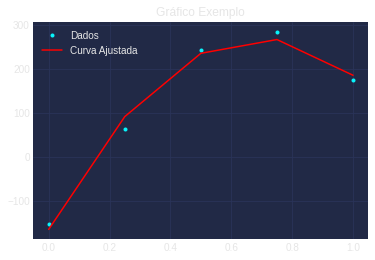

In [5]:
coef = Minimos_Quadrados(x, y, func)[4]
def fun_lin(a,b,c,x):
    return a + b*x + c*x**2

plt.style.use('cyberpunk')
plt.title("Gráfico Exemplo")
plt.plot(x,y,'.')
plt.plot(x,fun_lin(coef[0],coef[1],coef[2],x),'r-')
#plt.plot(9,np.min(polin_lag(x)),'yx',alpha = 0.9)
plt.legend(['Dados','Curva Ajustada'])
plt.show()

In [6]:
func = [lambda x:1,lambda x: x, lambda x: x**2, lambda x: np.log(x)] #após linearização da exponencial

x = np.array([0.9, 1.35, 1.4, 1.45, 1.96, 2.1, 2.32, 2.4])
y = np.array([1.687, 18.107, 24.372, 33.082, 1175.12, 3655.226, 25032.65, 52624.59])
Minimos_Quadrados(x, y, func)

(    f1    f2      f3        f4
 0  1.0  0.90  0.8100 -0.105361
 1  1.0  1.35  1.8225  0.300105
 2  1.0  1.40  1.9600  0.336472
 3  1.0  1.45  2.1025  0.371564
 4  1.0  1.96  3.8416  0.672944
 5  1.0  2.10  4.4100  0.741937
 6  1.0  2.32  5.3824  0.841567
 7  1.0  2.40  5.7600  0.875469,
          f1        f2        f3        f4        f5        f6        f7  \
 0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
 1  0.900000  1.350000  1.400000  1.450000  1.960000  2.100000  2.320000   
 2  0.810000  1.822500  1.960000  2.102500  3.841600  4.410000  5.382400   
 3 -0.105361  0.300105  0.336472  0.371564  0.672944  0.741937  0.841567   
 
          f8  
 0  1.000000  
 1  2.400000  
 2  5.760000  
 3  0.875469  ,
            f1         f2          f3         f4
 f1   8.000000  13.880000   26.089000   4.034698
 f2  13.880000  26.089000   52.083704   8.250745
 f3  26.089000  52.083704  108.593533  17.331775
 f4   4.034698   8.250745   17.331775   2.830443,
       

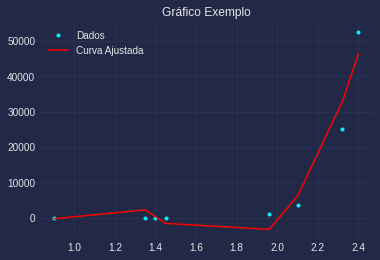

In [7]:
coef = Minimos_Quadrados(x, y, func)[4]
def fun_lin(a,b,c,d,x):
    return a + b*x + c*x**2 + d*np.log(x)

plt.style.use('cyberpunk')
plt.title("Gráfico Exemplo")
plt.plot(x,y,'.')
plt.plot(x,fun_lin(coef[0],coef[1],coef[2],coef[3],x),'r-')
#plt.plot(9,np.min(polin_lag(x)),'yx',alpha = 0.9)
plt.legend(['Dados','Curva Ajustada'])
plt.show()

### Métodos de integrais

 - Método dos trapézios

    A função integral_trapezoidal recebe como entrada a função f, os limites de integração a e b, e o número de subintervalos n.
    Calculamos o tamanho de cada subintervalo h dividindo a diferença entre b e a por n.
    Inicializamos a soma com o valor de f(a) e f(b).
    Utilizamos um loop para somar os valores intermediários. Para cada subintervalo, calculamos o valor de x e adicionamos 2 * f(x) à soma.
    Finalmente, calculamos a integral multiplicando a soma pelo tamanho do subintervalo h e dividindo por 2.

In [9]:
def integral_trapezoidal(f, a, b, n):
    # Cálculo do tamanho do intervalo
    h = (b - a) / n
    
    # Inicialização da soma
    soma = f(a) + f(b)
    
    # Loop para somar os valores intermediários
    for i in range(1, n):
        x = a + i * h
        soma += 2 * f(x)
    
    # Cálculo da integral usando a fórmula dos trapézios
    integral = (h / 2) * soma
    
    return integral

- Método 1/3 de Simpson

    A função integral_simpson recebe como entrada a função f, os limites de integração a e b, e o número de subintervalos n.
    Verificamos se n é par. Se não for, lançamos um erro, pois o método de Simpson requer um número par de subintervalos.
    Calculamos o tamanho de cada subintervalo h dividindo a diferença entre b e a por n.
    Inicializamos a soma com o valor de f(a) e f(b).
    Utilizamos um loop para somar os valores intermediários. Para cada subintervalo, calculamos o valor de x e adicionamos 2 * f(x) se o índice i for par, ou 4 * f(x) se o índice i for ímpar.
    Finalmente, calculamos a integral multiplicando a soma pelo tamanho do subintervalo h e dividindo por 3.

In [10]:
def integral_simpson(f, a, b, n):
    # Verificação de n par
    if n % 2 != 0:
        raise ValueError("O número de subintervalos deve ser par.")
    
    # Cálculo do tamanho do intervalo
    h = (b - a) / n
    
    # Inicialização da soma
    soma = f(a) + f(b)
    
    # Loop para somar os valores intermediários
    for i in range(1, n):
        x = a + i * h
        if i % 2 == 0:
            soma += 2 * f(x)
        else:
            soma += 4 * f(x)
    
    # Cálculo da integral usando a fórmula de 1/3 de Simpson
    integral = (h / 3) * soma
    
    return integral

In [11]:
def f(x):
    return np.exp(x)

#Exemplo, numero 1 letra A da lista
# Definição dos limites de integração
a = 1
b = 2

# Número de subintervalos
n_trapezios_4 = 4
n_trapezios_6 = 6
n_simpson_4 = 4
n_simpson_6 = 6

# Cálculo das integrais pelos métodos dos trapézios e de 1/3 de Simpson
integral_trapezios_4 = integral_trapezoidal(f, a, b, n_trapezios_4)
integral_trapezios_6 = integral_trapezoidal(f, a, b, n_trapezios_6)
integral_simpson_4 = integral_simpson(f, a, b, n_simpson_4)
integral_simpson_6 = integral_simpson(f, a, b, n_simpson_6)

# Cálculo dos limitantes superiores para o erro
erro_trapezios_4 = (b - a) ** 3 / (12 * n_trapezios_4 ** 2) * np.exp(b)
erro_trapezios_6 = (b - a) ** 3 / (12 * n_trapezios_6 ** 2) * np.exp(b)
erro_simpson_4 = (b - a) ** 5 / (180 * n_simpson_4 ** 4) * np.exp(b)
erro_simpson_6 = (b - a) ** 5 / (180 * n_simpson_6 ** 4) * np.exp(b)

# Resultados
print("Método dos Trapézios (4 divisões):")
print("Valor aproximado da integral:", integral_trapezios_4)
print("Limitante superior para o erro:", erro_trapezios_4)
print()
print("Método dos Trapézios (6 divisões):")
print("Valor aproximado da integral:", integral_trapezios_6)
print("Limitante superior para o erro:", erro_trapezios_6)
print()
print("Método de 1/3 de Simpson (4 divisões):")
print("Valor aproximado da integral:", integral_simpson_4)
print("Limitante superior para o erro:", erro_simpson_4)
print()
print("Método de 1/3 de Simpson (6 divisões):")
print("Valor aproximado da integral:", integral_simpson_6)
print("Limitante superior para o erro:", erro_simpson_6)

Método dos Trapézios (4 divisões):
Valor aproximado da integral: 4.695075916875121
Limitante superior para o erro: 0.03848466718193047

Método dos Trapézios (6 divisões):
Valor aproximado da integral: 4.6815812457126675
Limitante superior para o erro: 0.01710429652530243

Método de 1/3 de Simpson (4 divisões):
Valor aproximado da integral: 4.670874883494676
Limitante superior para o erro: 0.0001603527799247103

Método de 1/3 de Simpson (6 divisões):
Valor aproximado da integral: 4.670794226633774
Limitante superior para o erro: 3.167462319500451e-05
